# Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# defining path
path=r'/Users/ru/Desktop/CF/06_Achievement 6_VE'

In [7]:
# import data
df_ve = pd.read_pickle(os.path.join(path,'02_06_Data','2.2_06_Prepared Data',
                                 'df_ve_clean_y_n.pkl'))

In [8]:
df_ve.head()


,Unnamed: 0,Stimmart,Adresse,BezNr,BezNa,WahlBez,WahlBezArt,BWB,AGHWK,BTWK,...,Stimmber A2,Stimmber A3,TeilN,TeilN B1,Unglt Stimme,Glt Stimme,Stimme Ja,Stimme Nein,Unnamed: 20,Ergebnis
0,0,Stimme,01W100,1,Mitte,100,W,011A,1,75,...,741,0,519,12,11,508,299,209,NaN,yes
1,1,Stimme,01W101,1,Mitte,101,W,011B,1,75,...,490,0,366,10,6,360,182,178,NaN,yes
2,2,Stimme,01W102,1,Mitte,102,W,011B,1,75,...,692,0,406,10,8,398,217,181,NaN,yes
3,3,Stimme,01W103,1,Mitte,103,W,011C,1,75,...,569,0,329,10,9,320,159,161,NaN,no
4,4,Stimme,01W104,1,Mitte,104,W,011D,1,75,...,639,0,522,17,10,512,263,249,NaN,yes


# check and clean for purpose

In [9]:
df_ve.shape

(3764, 23)

In [10]:
df_ve.columns

Index(['Unnamed: 0', 'Stimmart', 'Adresse', 'BezNr', 'BezNa', 'WahlBez',
       'WahlBezArt', 'BWB', 'AGHWK', 'BTWK', 'OstWest', 'Stimmber  total',
       'Stimmber A1', 'Stimmber A2', 'Stimmber A3', 'TeilN', 'TeilN B1',
       'Unglt Stimme', 'Glt Stimme', 'Stimme Ja', 'Stimme  Nein',
       'Unnamed: 20', 'Ergebnis'],
      dtype='object')

In [ ]:
#check basic statistics of the relevant variables
# Valdid votes

In [11]:
df_ve['Glt Stimme'].max()

1288

In [12]:
df_ve['Glt Stimme'].min()

0

In [13]:
df_ve['Glt Stimme'].mean()

465.36875664187033

In [14]:
# the one polling station with 0 valid votes may add bias to the statistic. therefore it will be excludet here
df_ve = df_ve[~(df_ve['Glt Stimme'] == 0)]

In [15]:
df_ve['Glt Stimme'].min()

76

In [ ]:
# check of basic statistics yes votes

In [16]:
df_ve['Stimme Ja'].max()

821

In [17]:
df_ve['Stimme Ja'].min()

28

In [18]:
df_ve['Stimme Ja'].mean()

275.298963592878

# prepare data for regression analysis

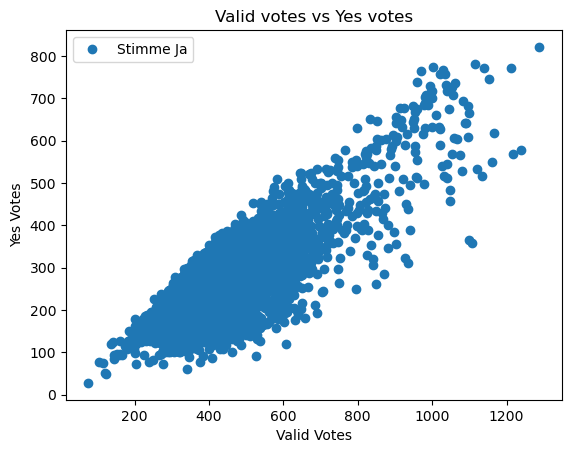

In [19]:
# Create a scatterplot using matplotlib for chosen varibles.

df_ve.plot(x = 'Glt Stimme', y='Stimme Ja',style='o') 
plt.title('Valid votes vs Yes votes')  
plt.xlabel('Valid Votes')  
plt.ylabel('Yes Votes')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ve['Glt Stimme'].values.reshape(-1,1)
y = df_ve['Stimme Ja'].values.reshape(-1,1)

In [22]:
X

array([[508],
       [360],
       [398],
       ...,
       [395],
       [369],
       [518]])

In [23]:
y

array([[299],
       [182],
       [217],
       ...,
       [171],
       [175],
       [181]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

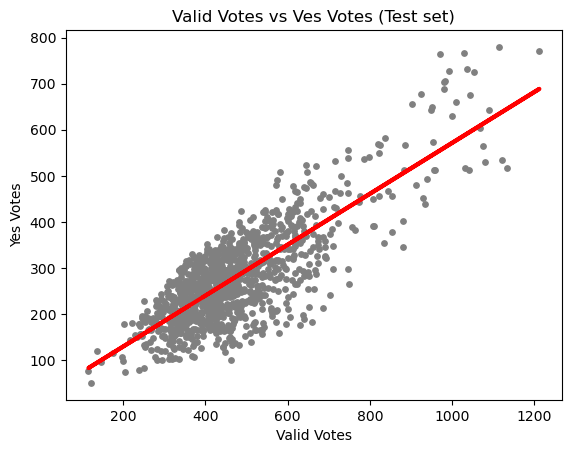

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Valid Votes vs Ves Votes (Test set)')
plot_test.xlabel('Valid Votes')
plot_test.ylabel('Yes Votes')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.55337922]]
Mean squared error:  4047.6691882130885
R2 score:  0.6299130176176677


INTERPRETATION OF RESULTS:
The slope of 0.55 signifys a positive correlation. If X rises, y rises as well. Here it means, the more valid votes, the more yes votes.

The Mean squared error of 4047.67 seams to me large, but I dont understand exactley what unit of measurement it is. Is it 'yes votes'? and what means large? in relation to what? Here I find the explanation in the exercise not very satisfying. I would be greatful for an explanation!

R2 score of 0.63 - it is closer to 1 than to 0 so it is a sort of positive outcome, but again I find it difficult to interprete. What is high? What is low?



In [31]:
y_predicted

array([[237.8545535 ],
       [283.23164947],
       [215.71938473],
       ...,
       [216.27276395],
       [324.73509091],
       [216.27276395]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,242,237.854553
1,263,283.231649
2,121,215.719385
3,277,338.016192
4,230,215.719385
5,238,222.913315
6,249,239.514691
7,780,635.180833
8,213,186.943665
9,165,215.166006


INTERPRETAION:

there are significant deviations between the actual an the predicted values.
So it seems, that the model is not fitting to well.

# Compare how the model fits the training set

In [33]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.55337922]]
Mean squared error:  3985.3455127291495
R2 score:  0.6194284821417534


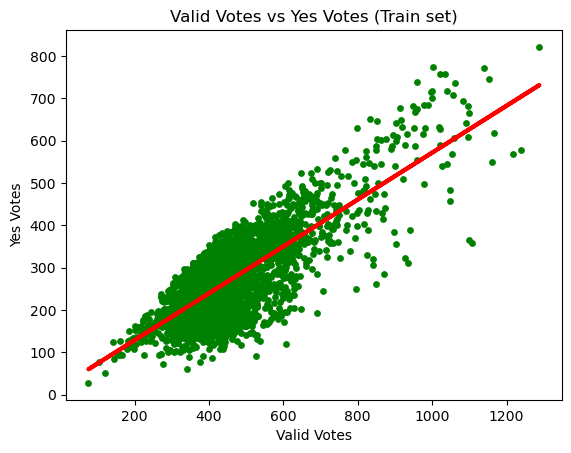

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Valid Votes vs Yes Votes (Train set)')
plot_test.xlabel('Valid Votes')
plot_test.ylabel('Yes Votes')
plot_test.show()

Interpretation: 
the test set and the training set have very similar outcome (R2 sore of 0,62 against 0,63)

# REMARKS and INTERPRETATION

What is obvious is, that there is a positive corrlation between the numbers of valid votes and the number of yes votes.
But on the same time it is not specific. Since the No votes increase in the same way. 
I would guess that the unclear results of the regression analysis have something to do with that: the ratio of yes and no keep more ore less the same, no matter if the valid votes increase or not. (Which means no matter if there are more or less voters in one voting district.)

I think that for my data set the regerssion analysis is not very informative, it does not fit so well for the information or the inherent character of my continous varibales (Small or big voting districts is not relevant in terms of the result)
Other factors are much more intersting. The geographical componant for example. But this is not represented in a continous variable which is necessary for the regression analysis. (but instead in a categorical variable, such as West or East, or in the concrete geographical information)